<a href="https://colab.research.google.com/github/PRAFULPAWAR8888/AI-ML-Projects2025/blob/main/DL/DL5-Project_Object_Recogination/object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing The Dependencies**

# **DL Project- CIFAR-10 OBJECT RECOGINATION USING RESNET50**

In [16]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [17]:
#import py7zr

#dataset = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL5-Object Recognition using ResNet50/cifar-10/train.7z"
#extract_path = r"C:/Users/pawar/Desktop/AiML Projects/DL/DL5-Object Recognition using ResNet50/cifar-10"

#with py7zr.SevenZipFile(dataset, mode='r') as archive:
 #   archive.extractall(path=extract_path)

#print("Dataset extracted successfully!")


In [18]:
import kagglehub
path = kagglehub.dataset_download("petitbonney/cifar10-image-recognition")

Using Colab cache for faster access to the 'cifar10-image-recognition' dataset.


In [19]:
print(path)

/kaggle/input/cifar10-image-recognition


In [42]:
path = "/root/.cache/kagglehub/datasets/petitbonney/cifar10-image-recognition/versions/1/"
import os

files = os.listdir(path)
print(files)


['trainLabels.csv', 'sampleSubmission.csv', 'test.npy', 'train.npy']


In [22]:
X_train = np.load(path + "/train.npy")

In [23]:
type(X_train)

numpy.ndarray

In [24]:
len(X_train)

32

In [25]:
print(X_train[0:5])
print(X_train[-5:])

[[[ 63  62  59]
  [ 45  46  43]
  [ 43  48  50]
  [ 42  54  68]
  [ 52  73  98]
  [ 63  91 119]
  [ 75 107 139]
  [ 80 110 145]
  [ 89 117 149]
  [ 93 120 149]
  [ 77 103 131]
  [ 76  99 125]
  [ 91 115 142]
  [ 86 112 144]
  [ 79 105 137]
  [ 71  97 129]
  [ 79 106 137]
  [ 76 106 134]
  [ 64  97 124]
  [ 78 113 139]
  [ 75 112 139]
  [ 69 105 133]
  [ 74 105 136]
  [ 77 108 139]
  [ 89 120 152]
  [100 131 163]
  [108 136 168]
  [102 129 159]
  [104 130 158]
  [108 132 158]
  [102 125 152]
  [103 124 148]]

 [[ 20  20  16]
  [  0   0   0]
  [  0   8  18]
  [  8  27  51]
  [ 21  51  88]
  [ 43  82 120]
  [ 45  89 128]
  [ 44  86 127]
  [ 50  87 126]
  [ 44  79 116]
  [ 37  70 106]
  [ 35  67 101]
  [ 36  70 105]
  [ 35  74 113]
  [ 33  70 109]
  [ 37  72 112]
  [ 44  79 119]
  [ 33  71 109]
  [ 27  69 105]
  [ 46  89 125]
  [ 46  92 127]
  [ 39  85 122]
  [ 47  89 131]
  [ 41  82 124]
  [ 37  79 121]
  [ 48  89 131]
  [ 53  91 132]
  [ 58  94 133]
  [ 60  96 133]
  [ 55  88 123]
  [ 50

# **Labels Processing**

In [26]:
labels_df = pd.read_csv(path + "/trainLabels.csv")

In [27]:
labels_df.info

<bound method DataFrame.info of           id       label
0          1        frog
1          2       truck
2          3       truck
3          4        deer
4          5  automobile
...      ...         ...
49995  49996        bird
49996  49997        frog
49997  49998       truck
49998  49999  automobile
49999  50000  automobile

[50000 rows x 2 columns]>

In [28]:
labels_df.shape


(50000, 2)

In [29]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [30]:
labels_df[labels_df["id"] == 4]

,id,label
3,4,deer


In [31]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [32]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [33]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [34]:
labels_dictionary = {"airplane":0, "automobile":1, "bird":2, "cat":3, "deer":4, "dog":5, "frog":6, "horse":7, "ship":8, "truck":9} #label encoding

labels = [labels_dictionary[i] for i in labels_df['label']]

In [35]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


(np.float64(-0.5), np.float64(2.5), np.float64(31.5), np.float64(-0.5))

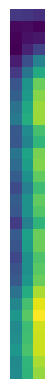

In [37]:
import numpy as np
import matplotlib.pyplot as plt

path = "/root/.cache/kagglehub/datasets/petitbonney/cifar10-image-recognition/versions/1/"

X_train = np.load(path + "/train.npy")

plt.imshow(X_train[0])
plt.axis("off")


In [38]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [39]:
id_list = list(labels_df["id"])

In [40]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# **Image Processing**

In [44]:
import numpy as np

train_npy_path = "/root/.cache/kagglehub/datasets/petitbonney/cifar10-image-recognition/versions/1/train.npy"

X_train = np.load(train_npy_path)

data = []
for idx in range(len(X_train)):
    data.append(X_train[idx])

data = np.array(data)


In [45]:

len(data)



32

In [46]:
type(data)

numpy.ndarray

In [47]:
data[0].shape



(32, 3)